# Projeto Programming - Regressão Linear

Regressão Linear Simples : f_wb = w * x + b

Regressão Linear Múltipla: f_wb = $\overrightarrow{w}$ . $\overrightarrow{x}$ + b

## Criação do dataset

In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
def generate_dataset(n_points, dimensions = 2, mean = 5, std_dev = 0.25):
    """Vai dar retorno a um dataset de vertical stack vetores com (n_points) data points 
    e (dimensions) colunas"""

    points = np.random.normal(loc= mean, scale= std_dev, size= (n_points, dimensions))        

    return np.vstack(points)

In [ ]:
# Exemplo de criação de um dataset com 150 pontos e 2 colunas (1 coluna para a feature e outra para a label)

dataset = generate_dataset(150, dimensions = 2)

dataset

array([[4.8691282 , 4.88117864],
       [4.9363844 , 4.91720539],
       [5.01355245, 5.19269861],
       [5.15599241, 4.85312129],
       [4.94369594, 4.83535652],
       [5.31477075, 4.94776217],
       [5.34674007, 4.49754057],
       [5.15330694, 4.94543497],
       [5.35304614, 5.22374393],
       [4.87427876, 4.86706777],
       [5.329293  , 5.51763783],
       [5.53342278, 4.90100626],
       [5.00122754, 4.53932155],
       [5.29306949, 4.86546557],
       [5.03999738, 5.02792322],
       [5.56613503, 5.20513282],
       [5.05227204, 4.66573935],
       [4.63438724, 4.86360258],
       [5.04024818, 4.69157373],
       [5.13426948, 5.0619818 ],
       [5.35192697, 4.57546231],
       [4.69116452, 5.09884927],
       [5.03713001, 5.26528716],
       [5.02306619, 5.00829295],
       [4.80291689, 5.11204313],
       [4.87370116, 4.79472176],
       [4.67984461, 4.88976026],
       [5.07042249, 4.92750926],
       [4.78362303, 4.63578118],
       [5.14821176, 4.6309407 ],
       [5.

## Iniciação da Regressão

In [148]:
def initial_lin_reg(x, y):

    b = np.random.uniform(1, 3)

    if x.ndim == 1:                                         # Se definirmos apenas 1 feature

        w = np.random.uniform(0, 1)                         # Gerar coeficiente de w de 0 ou 1

        y_hats = w * x + b                                  # Fazer previsões de y dado o w e b definidos acima

        plt.scatter(x, y)
        plt.plot(x, y_hats, color = 'red', label='Regressão Inicial')
        print(f'A representação inicial de y_hat = {w} x + {b}')

    else:                                                   # Se definirmos mais do que 1 feature no modelo

        w = np.random.randint(0,1,x.shape[1])               # Gerar coeficientes de w de 0 a 1 para cada feature

        y_hats = np.dot(x, w) + b

        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'A representação inicial de y_hat = {formula_regressao} + {b}')

    return w, b

A representação inicial de y_hat = 0.4601626276157531 x + 1.2494728075934236


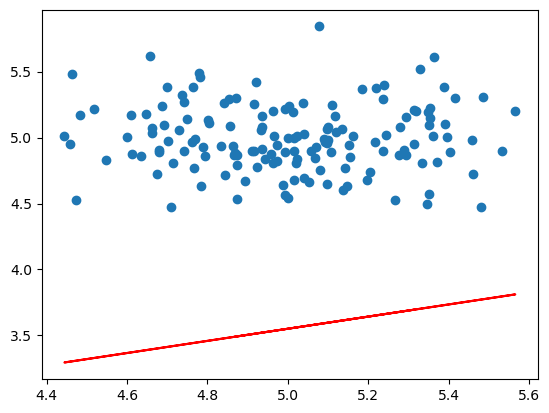

In [149]:
# Exemplo para testar a função initial_lin_reg


# x, y, w, b = initial_lin_reg(dataset[:, :-1], dataset[:, -1])           # Caso tenhamos + do que 1 feature

w, b = initial_lin_reg(dataset[:,0], dataset[:,1])                # Caso tenhamos apenas 1 feature

## Definição da função de custo - Mean Squared Error Function

In [150]:
def cost_function(x, y, w, b):

    m = len(x)                                              # Número de data points

    if x.ndim == 1:
        
        y_hats = w * x + b                                  # Previsões de y caso a regressão seja simples
    
    else:

        y_hats = np.dot(x, w) + b                           # Previsões de y caso a regressão seja múltipla    

    cost = (1/(2*m)) * np.sum((y_hats - y) ** 2)            # Função custo

    return y_hats, cost

In [151]:
y_hats, cost = cost_function(dataset[:,0], dataset[:,1], w, b)
y_hats, cost

(array([3.49006364, 3.52101242, 3.55652228, 3.62206782, 3.52437692,
        3.69513168, 3.70984277, 3.62083207, 3.71274458, 3.49243373,
        3.70181428, 3.79574717, 3.55085081, 3.68514557, 3.56869124,
        3.81080013, 3.57433959, 3.38204462, 3.56880666, 3.61207174,
        3.71222959, 3.4081714 , 3.56737179, 3.56090014, 3.45959567,
        3.49216794, 3.4029624 , 3.58269175, 3.45071735, 3.61848746,
        3.64972511, 3.44030615, 3.67781871, 3.41165588, 3.6828698 ,
        3.38734852, 3.71060738, 3.44906392, 3.44317028, 3.52071057,
        3.43470213, 3.59493002, 3.54517864, 3.76115636, 3.60499454,
        3.37069998, 3.67861045, 3.59590059, 3.42601417, 3.55909029,
        3.73643984, 3.54753589, 3.53420022, 3.43097916, 3.43092247,
        3.60137548, 3.52076422, 3.45934515, 3.5329893 , 3.50082726,
        3.66087604, 3.39497102, 3.73225493, 3.59994526, 3.68594891,
        3.58654265, 3.32864526, 3.42876738, 3.51103631, 3.41679162,
        3.44433574, 3.5925447 , 3.48238825, 3.71

## Gradiente Descendente

Adicionar aqui explicação do gradiente descendente

# Regressão Linear

In [152]:
def linear_regression(x, y, learning_rate = 0.01, n_iterations = 100000, min_error = 1e-6, min_update = 1e-6):
    """ Esta função recria o processo de regressão linear simples/múltipla. Inicia parâmetros aleatórios de w e b, ficando
    assim com uma linha de referência. Depois, através do conceito de cost function e gradiente descendente, o algoritmo vai atualizar
    os parâmetros de w e b de forma a otimizar o modelo de regressão, até ao ponto em que w e b convergem (ou até à condição de paragem 
    definida pelo utilizador ser atingida: número de passos, erro mínimo ou alterações entre iterações mínima);
    
    É devolvido o valor final de w, o valor final de b, e o histórico da função custo;

    x = features/input
    y = label/ouput
    learning_rate = tamanho da atualização dos parâmetros no processo de gradiente descendente
    n_iterations = número máximo de atualizações de w e b
    min_error = threshold de cost function para o algoritmo parar
    min_update = threshold de atualizações em w e b para o algoritmo parar
    
    """

    w, b = initial_lin_reg(x, y)
    cost_history = []
    m = len(x)

    for i in range(n_iterations):

        y_hats, cost = cost_function(x, y, w, b)

        if x.ndim == 1:
            dcdw = (1/m) * np.sum((y_hats - y) * x)         # Derivada da cost function em relação a w
        else: 
            dcdw = (1/m) * np.dot(x.T, (y_hats - y))        # Derivada da cost function em relação a w quando temos mais do que 1 variável indep.
            
        dcdb = (1/m) * np.sum(y_hats - y)                   # Derivada da cost function em relação a b

        w_new = w - learning_rate * dcdw                    # Atualização de w
        b_new = b - learning_rate * dcdb                    # Atualização de b

        current_cost = cost_function(x, y, w_new, b_new)[1]

        cost_history.append(current_cost)

        if (np.array_equal(w_new, w) if not np.isscalar(w) else w_new == w) and b_new == b:                                 # Se não houver mais atualizações dos parâmetros
                print(f'Paragem na iteração {i + 1} porque a os valores de w e b convergiram de acordo com o gradiente.')
                break

        if current_cost < min_error:
                print(f'Paragem na iteração {i + 1} porque a função custo atual ({current_cost}) já não é superior a {min_error}.')
                break

        if np.all(np.abs(w_new - w) < min_update) and np.abs(b_new - b) < min_update:
                print(f'Paragem na iteração {i + 1} porque as alterações em w e b já não são maiores do que {min_update}.')
                break
        
        w, b = w_new, b_new
        
    else:
        print(f'Paragem porque atingiu o número máximo de iterações: {i + 1}')

    
    if x.ndim == 1:
        print(f'O ótimo da regressão está definido em y_hat = {w} x + {b}')
        plt.scatter(x, y)
        plt.plot(x, w* x + b, color = 'green', label='Regressão Final', linewidth=2)
        plt.legend()
        plt.title('Representação do dataset e regressões lineares')

    else:
        formula_regressao = " + ".join([f"{w[i]}*x{i+1}" for i in range(len(w))]) if len(w) > 1 else f"{w[0]}x + {b}"
        print(f'O ótimo da regressão está definido em y_hat = {formula_regressao} + {b}')
    
    return w, b, cost_history

A representação inicial de y_hat = 0.17548586953206635 x + 2.7227991633644253
Paragem porque atingiu o número máximo de iterações: 50000
O ótimo da regressão está definido em y_hat = 0.10283890363671859 x + 4.481497797476553


(0.10283890363671859,
 4.481497797476553,
 [0.5691792399038291,
  0.3288505068265696,
  0.1976053175298094,
  0.125931329427519,
  0.08678954452666127,
  0.06541379798263983,
  0.0537401954058049,
  0.04736499395488471,
  0.04388328229610171,
  0.041981723404158046,
  0.04094309576747758,
  0.040375720261236044,
  0.040065698481178816,
  0.03989621917941695,
  0.03980349100752522,
  0.039752677113680884,
  0.039724752876600725,
  0.039709328832368336,
  0.03970073123017051,
  0.03969586159942677,
  0.039693027846096456,
  0.03969130590710755,
  0.03969019114587309,
  0.03968940797721632,
  0.03968880590235905,
  0.03968830273298271,
  0.0396878535855353,
  0.039687433948829676,
  0.039687030437153666,
  0.039686635740486316,
  0.03968624586677919,
  0.03968585863594942,
  0.039685472857439695,
  0.03968508788107881,
  0.039684703351803734,
  0.03968431907571193,
  0.039683934946911546,
  0.039683550907573896,
  0.03968316692611784,
  0.03968278298529639,
  0.039682399075690274,
  0.039

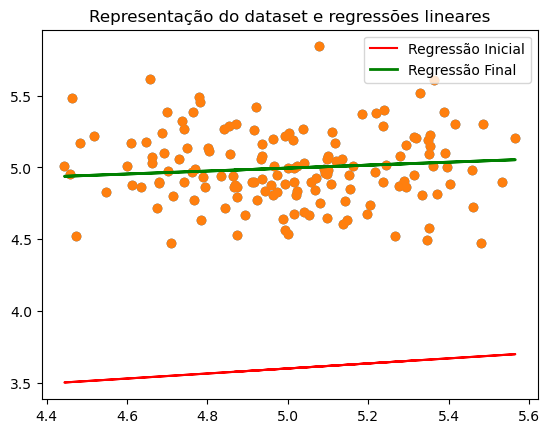

In [153]:
linear_regression(dataset[:,0], dataset[:,1], learning_rate = 0.01, n_iterations=50000)

## Aplicação prática da regressão

In [154]:
horas_estudo = np.array([8,0.5,2,3.4,9,13,10,3.7,8,7.7,14,11,4.8,3.7,12,1.75,6,9,8,15,5,6,7,8,9,10,11,12,13,14,15,0.75,1.75,2.4,3.9,5.84,6.95,5,8.75,9,11.5,13,16,12.85,13,14,10.5,13,12.75,10])

nota_exame = np.array([14,5,8,7.5,12,16,14,10,11,13,18,16,7.5,9,19,4.75,3.5,14,12.5,12,6,4.75,12,14,10,16.5,18,17,15.5,16,18,4.5,7,5,8,3.75,9,11,9.5,7.6,14.5,16,18.5,17.75,14.5,19,17,15.5,16,13])

In [155]:
horas_estudo.shape, nota_exame.shape

((50,), (50,))

A representação inicial de y_hat = 0.754382512814484 x + 2.0747390242764743
Paragem na iteração 11580 porque as alterações em w e b já não são maiores do que 1e-12.
O ótimo da regressão está definido em y_hat = 0.9448042025017789 x + 3.878528693150314


(0.9448042025017789,
 3.878528693150314,
 [3.2206168462727804,
  3.18923576311736,
  3.1879587129679203,
  3.1868394668860156,
  3.185725233555391,
  3.184615217576393,
  3.183509399040347,
  3.182407762054801,
  3.1813102908075055,
  3.1802169695461084,
  3.1791277825778184,
  3.1780427142691945,
  3.1769617490459043,
  3.1758848713925083,
  3.1748120658522425,
  3.173743317026786,
  3.172678609576048,
  3.1716179282179455,
  3.1705612577281808,
  3.169508582940026,
  3.1684598887441062,
  3.167415160088181,
  3.1663743819769294,
  3.1653375394717287,
  3.164304617690452,
  3.1632756018072428,
  3.162250477052312,
  3.1612292287117163,
  3.1602118421271546,
  3.1591983026957537,
  3.1581885958698597,
  3.1571827071568306,
  3.156180622118827,
  3.155182326372601,
  3.1541878055893,
  3.1531970454942484,
  3.1522100318667534,
  3.1512267505398963,
  3.1502471874003244,
  3.149271328388059,
  3.1482991594962857,
  3.147330666771154,
  3.1463658363115825,
  3.1454046542690515,
  3.144447

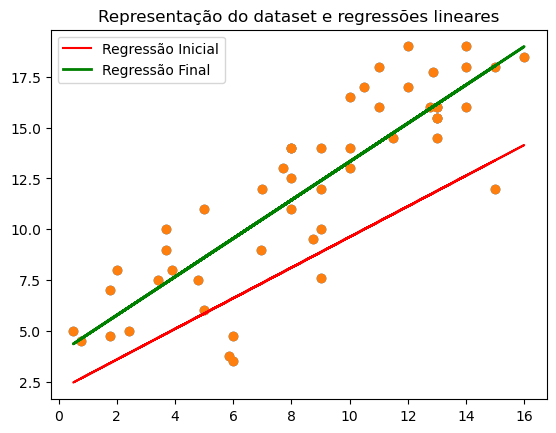

In [156]:
linear_regression(horas_estudo,nota_exame, learning_rate = 0.01, n_iterations = 20000, min_error = 1e-12, min_update = 1e-12)